## Lab 3: Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.neighbors
from sklearn.preprocessing import PolynomialFeatures
import pickle
import matplotlib.pyplot as plt

In [2]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)

x_exact = np.arange(np.min(X),np.max(X), 0.001)
y_exact = w4*(x_exact**4) + w3*(x_exact**3) + w2*(x_exact**2) + w1*x_exact + w0

<AxesSubplot:xlabel='x', ylabel='y'>

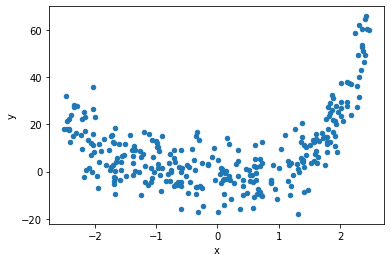

In [3]:
df.plot.scatter(x='x',y='y')

In [4]:
Xb = np.c_[np.ones((size, 1)), X]
theta_best = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
print(theta_best)

[8.92973485 3.50194585]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(Xb, y, test_size=0.2)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# count mean for lin_reg
lin_reg_train_mse = np.sum(np.power((lin_reg.predict(X_train)-y_train), 2))/len(y_train)
lin_reg_test_mse = np.sum(np.power((lin_reg.predict(X_test)-y_test), 2))/len(y_test)
print(lin_reg_train_mse)
print(lin_reg_test_mse)

227.22539848219233
176.61933376079912


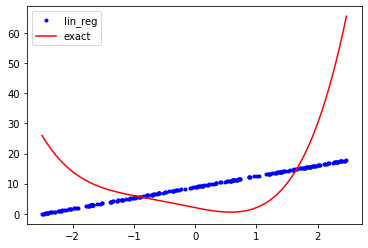

In [7]:
plt.plot(X_train[:, 1], lin_reg.predict(X_train), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [8]:
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train, y_train)

# count mean for knn_3_reg
knn_3_reg_train_mse = np.sum(np.power((knn_3_reg.predict(X_train)-y_train), 2))/len(y_train)
knn_3_reg_test_mse = np.sum(np.power((knn_3_reg.predict(X_test)-y_test), 2))/len(y_test)
print(knn_3_reg_train_mse)
print(knn_3_reg_test_mse)

43.27698653203711
64.00302864989715


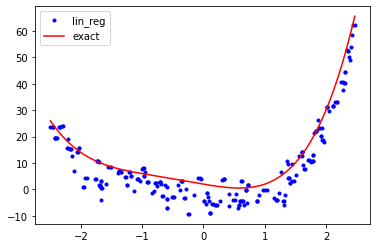

In [9]:
plt.plot(X_train[:, 1], knn_3_reg.predict(X_train), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [10]:
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)

# count mean for knn_5_reg
knn_5_reg_train_mse = np.sum(np.power((knn_5_reg.predict(X_train)-y_train), 2))/len(y_train)
knn_5_reg_test_mse = np.sum(np.power((knn_5_reg.predict(X_test)-y_test), 2))/len(y_test)
print(knn_5_reg_train_mse)
print(knn_5_reg_test_mse)

52.059911413910505
69.10180992600742


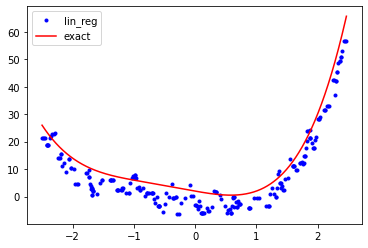

In [11]:
plt.plot(X_train[:, 1], knn_5_reg.predict(X_train), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [12]:
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_2 = poly_feature_2.fit_transform(X_train)
X_poly_test_2 = poly_feature_2.fit_transform(X_test)
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_train_2, y_train)

poly_2_reg_train_mse = np.sum(np.power((poly_2_reg.predict(X_poly_train_2)-y_train), 2))/len(y_train)
poly_2_reg_test_mse = np.sum(np.power((poly_2_reg.predict(X_poly_test_2)-y_test), 2))/len(y_test)
print(poly_2_reg_train_mse)
print(poly_2_reg_test_mse)

85.95739014336192
86.73556071314883


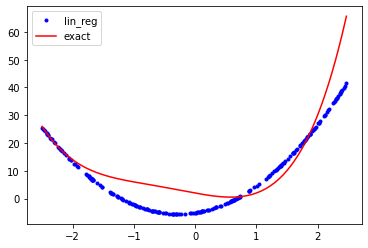

In [13]:
plt.plot(X_train[:, 1], poly_2_reg.predict(X_poly_train_2), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [14]:
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train_3 = poly_feature_3.fit_transform(X_train)
X_poly_test_3 = poly_feature_3.fit_transform(X_test)
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly_train_3, y_train)

poly_3_reg_train_mse = np.sum(np.power((poly_3_reg.predict(X_poly_train_3)-y_train), 2))/len(y_train)
poly_3_reg_test_mse = np.sum(np.power((poly_3_reg.predict(X_poly_test_3)-y_test), 2))/len(y_test)
print(poly_3_reg_train_mse)
print(poly_3_reg_test_mse)

68.79918400507735
69.57779470646715


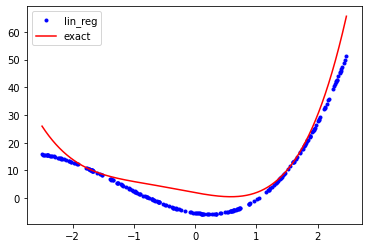

In [15]:
plt.plot(X_train[:, 1], poly_3_reg.predict(X_poly_train_3), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [16]:
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_train_4 = poly_feature_4.fit_transform(X_train)
X_poly_test_4 = poly_feature_4.fit_transform(X_test)
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly_train_4, y_train)

poly_4_reg_train_mse = np.sum(np.power((poly_4_reg.predict(X_poly_train_4)-y_train), 2))/len(y_train)
poly_4_reg_test_mse = np.sum(np.power((poly_4_reg.predict(X_poly_test_4)-y_test), 2))/len(y_test)
print(poly_4_reg_train_mse)
print(poly_4_reg_test_mse)

59.557028643163086
59.69478743729503


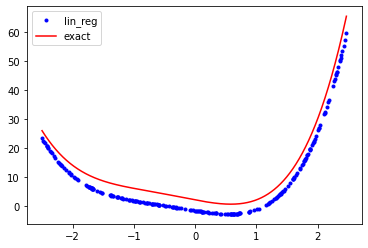

In [17]:
plt.plot(X_train[:, 1], poly_4_reg.predict(X_poly_train_4), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [18]:
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_train_5 = poly_feature_5.fit_transform(X_train)
X_poly_test_5 = poly_feature_5.fit_transform(X_test)
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly_train_5, y_train)

poly_5_reg_train_mse = np.sum(np.power((poly_5_reg.predict(X_poly_train_5)-y_train), 2))/len(y_train)
poly_5_reg_test_mse = np.sum(np.power((poly_5_reg.predict(X_poly_test_5)-y_test), 2))/len(y_test)
print(poly_5_reg_train_mse)
print(poly_5_reg_test_mse)

59.478024121361834
60.30037845398018


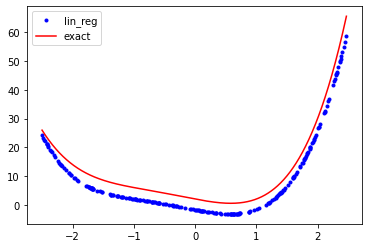

In [19]:
plt.plot(X_train[:, 1], poly_5_reg.predict(X_poly_train_5), 'b.', label='lin_reg')
plt.plot(x_exact, y_exact, 'r-', label='exact')
plt.legend()
plt.show()

In [20]:
result = pd.DataFrame({'train_mse': [lin_reg_train_mse, knn_3_reg_train_mse, knn_5_reg_train_mse, poly_2_reg_train_mse, poly_3_reg_train_mse, poly_4_reg_train_mse, poly_5_reg_train_mse], 'test_mse': [lin_reg_test_mse, knn_3_reg_test_mse, knn_5_reg_test_mse, poly_2_reg_test_mse, poly_3_reg_test_mse, poly_4_reg_test_mse, poly_5_reg_test_mse]}, index=['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])
result.to_pickle('mse.pkl')
result

,train_mse,test_mse
lin_reg,227.225398,176.619334
knn_3_reg,43.276987,64.003029
knn_5_reg,52.059911,69.101810
poly_2_reg,85.957390,86.735561
poly_3_reg,68.799184,69.577795
poly_4_reg,59.557029,59.694787
poly_5_reg,59.478024,60.300378


In [21]:
list_of_regs = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2), (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4), (poly_5_reg, poly_feature_5)]

In [22]:
f = open('reg.pkl', 'wb')
pickle.dump(list_of_regs, f)
f.close()